**Algoritmo de Agrupamento Kmeans**

**Código baseado em:**

1) https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset

2) https://realpython.com/k-means-clustering-python/

In [209]:
!pip install plotly --upgrade
!pip install kneed 
#To install only knee-detection algorithm

In [210]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from kneed import DataGenerator, KneeLocator #para mostrar o número de grupos ideal do agrupamento
from sklearn.cluster import KMeans #Importando a função Kmeans
from sklearn.preprocessing import StandardScaler #Função utilizada para normalização dos dados
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler #Função utilizada para normalização dos dados

In [211]:
import pandas as pd
base= pd.read_csv('Iris.csv', sep=',',encoding='cp1252')
base

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [212]:
Entrada = base.iloc[:, 0:4].values

In [213]:
# identifição de outliers
Q1 = np.percentile(Entrada, 25, axis=0)
Q3 = np.percentile(Entrada, 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mask = ((Entrada >= lower_bound) & (Entrada <= upper_bound)).all(axis=1)

base_filtrada = base[mask]


In [214]:
# Normalização com MinMaxScaler usando os dados filtrados
scaler = MinMaxScaler()
colunas_para_normalizar = base_filtrada.iloc[:, :-1]  # Todas as colunas exceto a última
base_normalizada = pd.DataFrame(scaler.fit_transform(colunas_para_normalizar),
                                columns=colunas_para_normalizar.columns)
base_normalizada[base.columns[-1]] = base_filtrada[base.columns[-1]]  # Adiciona a coluna 'class' original

print("DataFrame normalizado (com outliers removidos):")
print(base_normalizada)
print("\nEstatísticas descritivas:")
print(base_normalizada.describe())

# Atualiza a variável Entrada_normalizada para usar os dados normalizados (sem a coluna 'class')
Entrada_normalizada = base_normalizada.iloc[:, :-1].values

DataFrame normalizado (com outliers removidos):
    sepallength  sepalwidth  petallength  petalwidth        class
0      0.533333    0.400000        0.375    0.333333  Iris-setosa
1      0.400000    0.066667        0.375    0.333333  Iris-setosa
2      0.266667    0.200000        0.250    0.333333  Iris-setosa
3      0.200000    0.133333        0.500    0.333333  Iris-setosa
4      0.466667    0.466667        0.375    0.333333  Iris-setosa
5      0.733333    0.666667        0.750    1.000000  Iris-setosa
6      0.200000    0.333333        0.375    0.666667  Iris-setosa
7      0.466667    0.333333        0.500    0.333333  Iris-setosa
8      0.066667    0.000000        0.375    0.333333  Iris-setosa
9      0.400000    0.133333        0.500    0.000000  Iris-setosa
10     0.733333    0.533333        0.500    0.333333  Iris-setosa
11     0.333333    0.333333        0.625    0.333333  Iris-setosa
12     0.333333    0.066667        0.375    0.000000  Iris-setosa
13     0.000000    0.066667 

In [215]:
Entrada

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4]])

Para analisar Silhouette:
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [216]:
silhouette_scores = []
limit = int((len(base_filtrada)//2)**0.5)
for k in range(2, limit + 1):
    model = KMeans(n_clusters=k)
    pred = model.fit_predict(Entrada_normalizada)
    score = silhouette_score(Entrada_normalizada, pred)
    silhouette_scores.append(score)
    print(f'Silhouette Score k = {k}: {score:.3f}')
    # Escolher o k com maior Silhouette Score
k_silhouette = np.argmax(silhouette_scores) + 2  # +2 porque começamos em k=2

Silhouette Score k = 2: 0.372
Silhouette Score k = 3: 0.233


**WCSS - Within Clusters Sum of Squares = é a soma dos quadrados dentro dos clusters**
https://rpubs.com/diascodes/770518

Veja: https://en.wikipedia.org/wiki/Elbow_method_(clustering)

In [217]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(Entrada_normalizada)
    wcss.append(kmeans.inertia_)
    


**Usando o método Elbow para encontrar o número ideal de clusters**

In [218]:
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
k_ideal = kl.elbow
n_clusters = k_ideal if k_ideal == k_silhouette else max(k_ideal, k_silhouette)
print(f'\nNúmero ideal de clusters (Elbow): {k_ideal}')
print(f'Número ideal de clusters (Silhouette): {k_silhouette}')
print(f'Número final de clusters escolhido: {n_clusters}')


Número ideal de clusters (Elbow): 3
Número ideal de clusters (Silhouette): 2
Número final de clusters escolhido: 3


**Vamos analisar o ponto de inflexão dessa curva?**

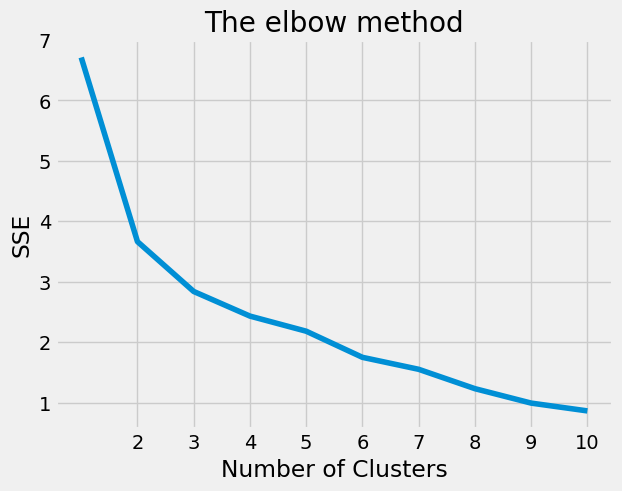

In [219]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), wcss)
plt.xticks(range(2, 11))
plt.title('The elbow method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [220]:
from sklearn.metrics import davies_bouldin_score
kmeans_filtrado = KMeans(n_clusters=3, random_state=10)
saida_kmeans_filtrado = kmeans_filtrado.fit_predict(Entrada_normalizada)

# Cálculo do índice
dbi = davies_bouldin_score(Entrada_normalizada, saida_kmeans_filtrado)
print(f'Índice Davies-Bouldin para k=3: {dbi:.3f}')

Índice Davies-Bouldin para k=3: 1.188


In [221]:
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
k_ideal = kl.elbow


In [222]:
#K-means++ é um método de otimização de centroide para ajudar o modelo a convergir mais rapidamente
kmeans_final = KMeans(n_clusters=n_clusters, random_state=10)
#kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
saida_kmeans = kmeans_final.fit_predict(Entrada_normalizada)

In [223]:
centroides = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=colunas_para_normalizar.columns)
print("Centroides dos clusters")
print(centroides)

Centroides dos clusters
   sepallength  sepalwidth  petallength  petalwidth
0     5.075000        3.60     1.500000        0.35
1     4.720000        3.04     1.440000        0.20
2     5.116667        3.50     1.516667        0.20
3     5.550000        3.85     1.700000        0.35
4     5.800000        4.00     1.200000        0.20
5     4.850000        3.05     1.450000        0.10
6     4.300000        3.00     1.100000        0.10
7     5.550000        4.15     1.400000        0.40
8     4.800000        3.40     1.900000        0.20
9     4.600000        3.40     1.400000        0.30


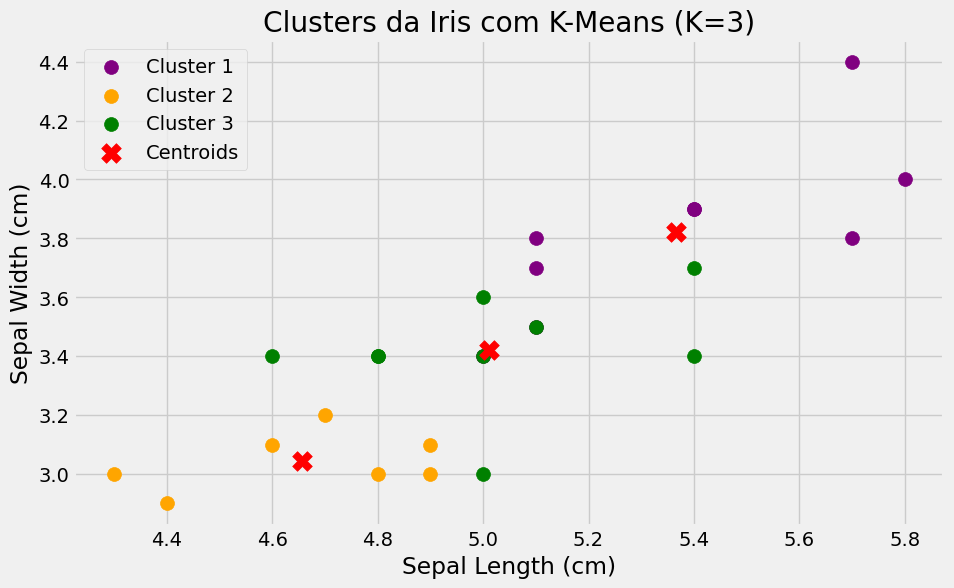

In [ ]:
kmeans_final = KMeans(n_clusters=n_clusters, random_state=10)
saida_kmeans = kmeans_final.fit_predict(Entrada_normalizada)

# Visualização dos clusters
dados_plot = base_filtrada.iloc[:, [0,1]].values

plt.figure(figsize=(10, 6))
cores = ['purple', 'orange', 'green', 'blue', 'cyan']

for i in range(n_clusters):
    plt.scatter(dados_plot[saida_kmeans == i, 0], 
                dados_plot[saida_kmeans == i, 1], 
                s=100, c=cores[i], label=f'Cluster {i+1}')

centroides_originais = scaler.inverse_transform(kmeans_final.cluster_centers_)
plt.scatter(centroides_originais[:, 0], centroides_originais[:, 1],
            s=200, c='red', marker='X', label='Centroids')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title(f'Clusters da Iris com K-Means (K={n_clusters})')
plt.legend()
plt.show()


DBSCAN - Clusters: 1, Ruído: 2
Rótulos encontrados: [-1  0]


C:\Users\diasf\AppData\Local\Temp\ipykernel_25512\2975991813.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cores = plt.cm.get_cmap('tab10', n_clusters_dbscan)


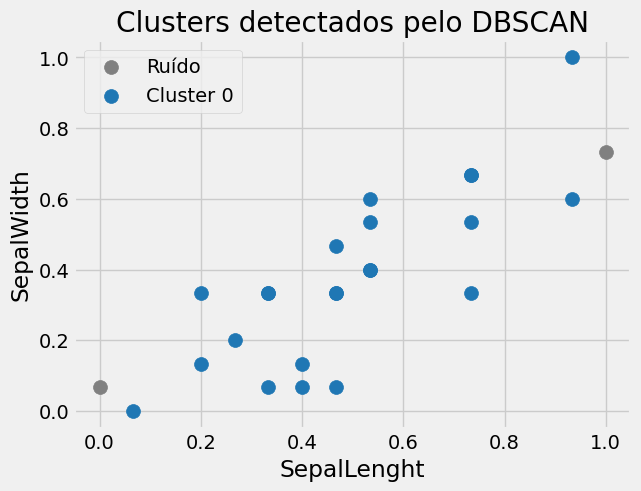

In [255]:
# ------------------------- DBSCAN -------------------------
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Aplicando DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(Entrada_normalizada)

# Número de clusters (descontando ruído)
n_clusters_dbscan = len(np.unique(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_ruido = np.sum(clusters_dbscan == -1)

print(f"\nDBSCAN - Clusters: {n_clusters_dbscan}, Ruído: {n_ruido}")
print(f"Rótulos encontrados: {np.unique(clusters_dbscan)}")

# ----------------- PLOT -----------------
# Paleta de cores: um para cada cluster e um cinza para o ruído (-1)
cores = plt.cm.get_cmap('tab10', n_clusters_dbscan)

# Plotagem dos pontos
for cluster_id in np.unique(clusters_dbscan):
    if cluster_id == -1:
        # Ruído
        cor = 'gray'
        label = 'Ruído'
    else:
        cor = cores(cluster_id)
        label = f'Cluster {cluster_id}'

    plt.scatter(
        Entrada_normalizada[clusters_dbscan == cluster_id, 0],
        Entrada_normalizada[clusters_dbscan == cluster_id, 1],
        s=100,
        c=[cor],
        label=label
    )

plt.title('Clusters detectados pelo DBSCAN')
plt.xlabel('SepalLenght')
plt.ylabel('SepalWidth')
plt.legend()
plt.show()


SOM - Clusters: 3


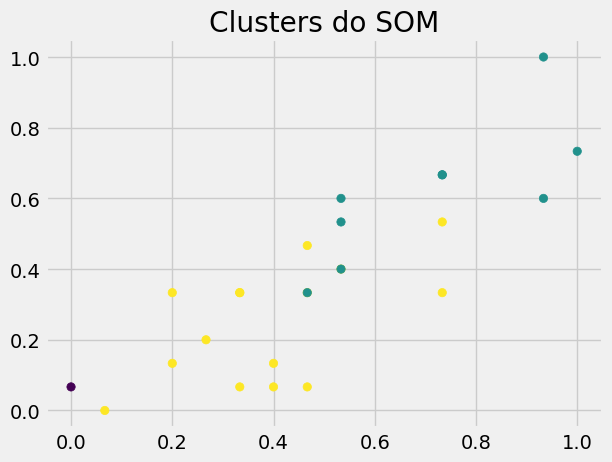

In [258]:
# ------------------------- SOM -------------------------
!pip install minisom
from minisom import MiniSom

som = MiniSom(x=3, y=1, input_len=4, sigma=0.5, learning_rate=0.5)
som.train_random(Entrada_normalizada, 100)

winner_coordinates = np.array([som.winner(x) for x in Entrada_normalizada])
clusters_som = winner_coordinates[:, 0]

print(f"SOM - Clusters: {len(np.unique(clusters_som))}")

# Plotar clusters do SOM
plt.scatter(Entrada_normalizada[:, 0], Entrada_normalizada[:, 1], c=clusters_som, cmap='viridis')
plt.title('Clusters do SOM')
plt.show()